Agent 0


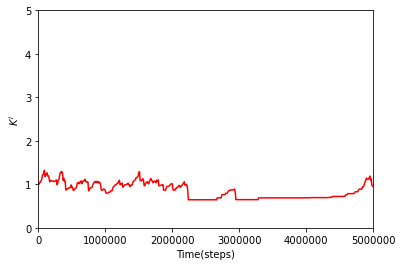

Agent 1
Stop at 2250000


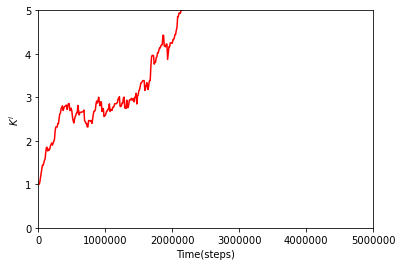

Agent 2


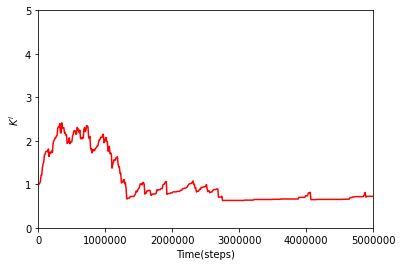

Agent 3


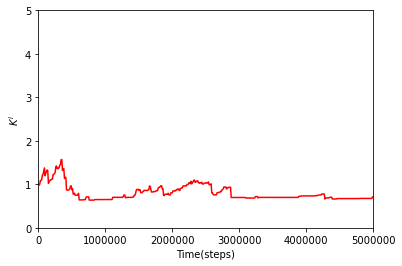

Agent 4
Stop at 1750000


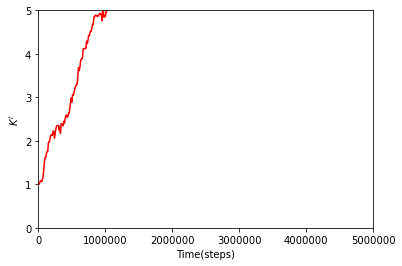

Agent 5


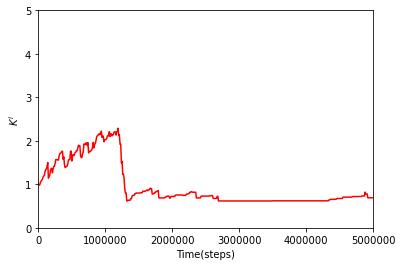

Agent 6
Stop at 2500000


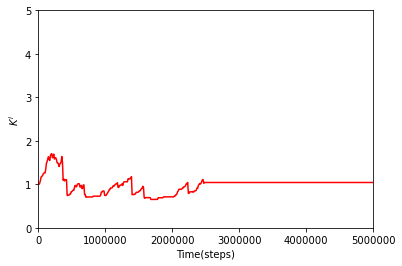

Agent 7
Stop at 1250000


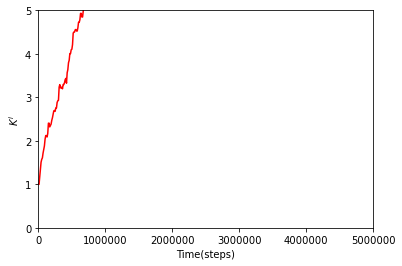

Agent 8


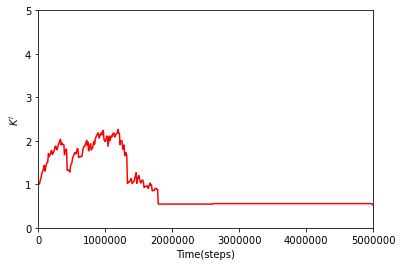

Agent 9


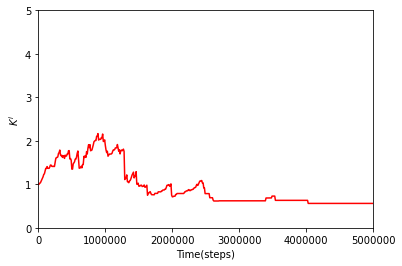

Agent 10


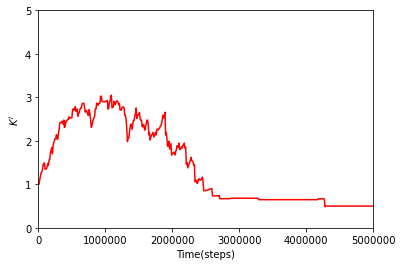

Agent 11
Stop at 1500000


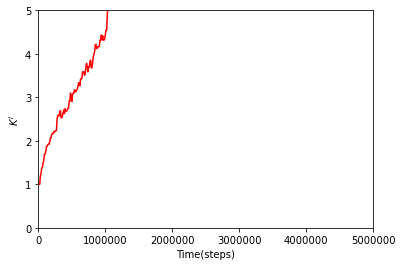

Agent 12


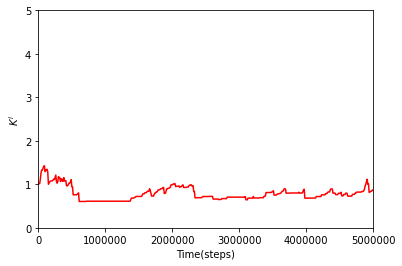

Agent 13


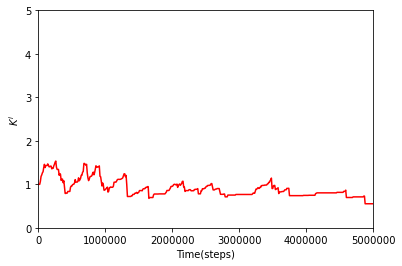

Agent 14


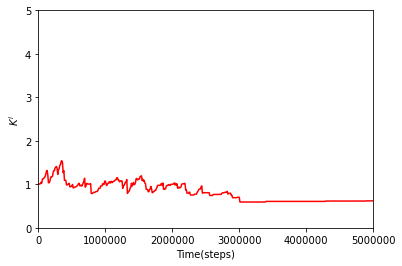

Agent 15


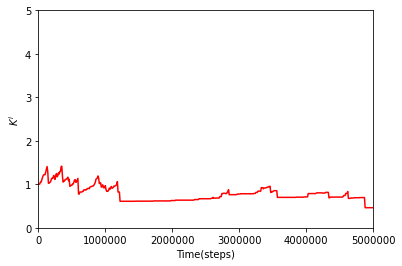

Agent 16


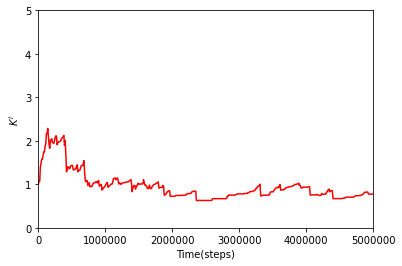

Agent 17
Stop at 2000000


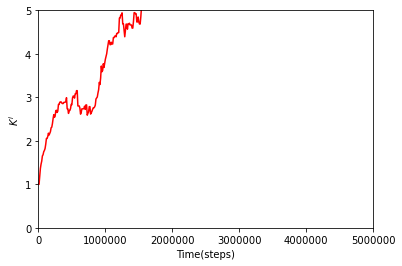

Agent 18
Stop at 1000000


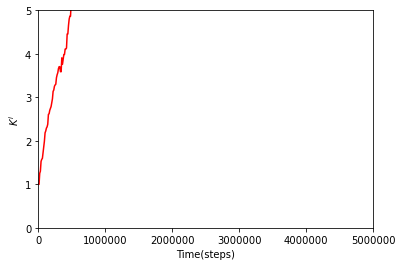

Agent 19


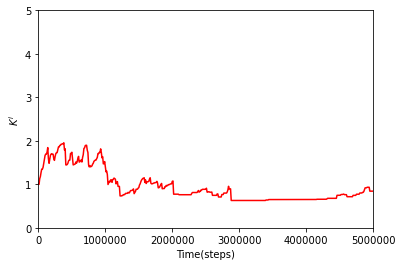

In [19]:
#補正係数と待機時間の散布図を出力するプログラム
import pandas as pd
import os
import matplotlib.pyplot as plt
import pathlib
import numpy as np

#設定
robots_num = 20
#agent_type = "TimeChange"
agent_type = "Onebyone"
target_type = "5-AMTDS-ESC"
date = "09-17 14-56-24 robots-number=20_1"
robotNum = 20
time = 10000
endTime = 5000000
x = []
y = []
env = "Office"
stop_agents = [18, 7, 11, 4, 17, 1, 6]
stop_time = [1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000]

for j in range(robotNum):
    x.clear()
    y.clear()
    for i in range(0, endTime, time):
        x.append(i)

        df = pd.read_csv("../../../../Volumes/ExternalDisk1/Patrolling/log/OTest/" + agent_type + "/" + env + "/" + target_type + "/" + date + "/Agent" + str(j) + "/Correction.csv", names=['time', 'before', 'after', 'real', 'req'], header=None)
        K = df[df['time'] <= i].tail(1)['after']
        y.append(K)

    plt.plot(x, y, color="red")

    #ラベルの追加
    plt.xlabel('Time(steps)')
    plt.ylabel('$K^i$')

    #現在の軸設定データを取得
    ax = plt.gca()
    #y軸目盛表記を調整する
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(0, y_max)

    #表示範囲の指定
    plt.xlim(0, 5000000)
    plt.ylim(0, 5)

    plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000])

    #指数表記から普通の表記に変換
    plt.ticklabel_format(style='plain',axis='x')

    #フォルダがない場合は、作成
    p_dir = pathlib.Path("../../../../Volumes/ExternalDisk1/Patrolling/result/correction_transition/" + agent_type)
    if not p_dir.exists():
        p_dir.mkdir(parents=True)

    #グラフの保存
    plt.savefig(str(p_dir) + "/" + 'CorrectionTransition_' + str(j) + '.png', bbox_inches="tight")

    print("Agent " + str(j))
    if j in stop_agents:
        print("Stop at " + str(stop_time[stop_agents.index(j)]))
    plt.show()
    